# Livrable 1 - Pre-traitement des données et analyse exploratoire

## Contexte
Une agence immobilière voudrait optimiser sa proposition de biens aux futurs acheteurs tout en minimisant le nombre de visites en utilisant l’intelligence artificielle

### Donnéees
Les données sont issues du recensement de 1990 en Californie.

### Objectif
L’objectif de ce livrable est de préparer les données pour l’analyse exploratoire et de réaliser une analyse exploratoire des données.
Il s'agit donc de prétraiter des informations avant son exploitation dans un algorithme.

### Contraintes
- Les données sont fournies dans un fichier CSV.
- Utilisation de l'algorithme K-means pour la classification des données.

### Livrable
Le livrable est un notebook Jupyter contenant le code et les commentaires nécessaires à la compréhension du code.

## Charger les données
Puisque les données proviennent d'un fichier CSV, nous utiliserons la fonction read_csv de Pandas pour charger les données dans un DataFrame.

In [3]:
import os
import tarfile
import pathlib

HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = str(pathlib.Path().resolve()) + "\housing.tgz"

# 1. Dézipper le fichier housing.tgz dans le dossier datasets/housing
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    # open file
    file = tarfile.open(housing_url)

    # extracting file
    file.extractall(housing_path)

    file.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
import numpy as np

# 2. Charger le fichier housing.csv dans un DataFrame
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path, sep=',')

In [6]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Création du jeu de test

In [7]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) # replace where false

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print(train_index, test_index) # 1 seul tour de boucle si n_splits = 1
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  income_cat          16512 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
 10  income_cat          4128 non-null   float64
dtypes: float64(10), object(1)
memory usage: 387.0+ KB


## Étude des données

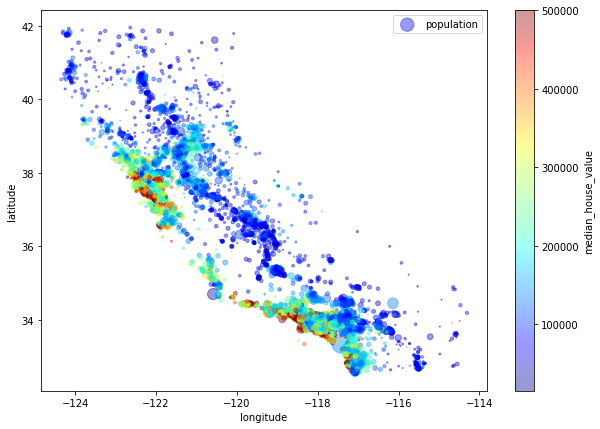

In [11]:
import matplotlib.pyplot as plt
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

## Analyse des données

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  income_cat          16512 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


### Dendrogramme

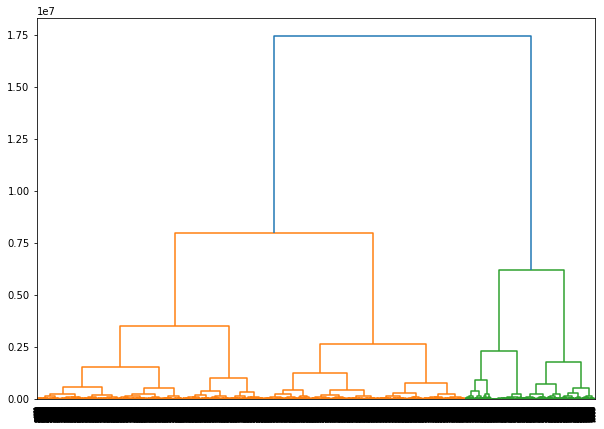

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = train_set.copy() # A new copy of data set
X.drop("ocean_proximity", axis=1, inplace=True) # Not numerical
X.drop("total_bedrooms", axis=1, inplace=True) # Missing values

plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

### Recherche de corrélations

#### Calcul de la matrice de corrélation

In [14]:
corr_matrix = train_set.corr()
corr_matrix["median_income"].sort_values(ascending=False)

C:\Users\mathi\AppData\Local\Temp\ipykernel_19264\3671471090.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


median_income         1.000000
income_cat            0.902151
median_house_value    0.687151
total_rooms           0.200133
households            0.010869
population            0.002421
total_bedrooms       -0.009643
longitude            -0.019615
latitude             -0.075146
housing_median_age   -0.111315
Name: median_income, dtype: float64

#### Affichage des corrélations sous forme de graphique

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

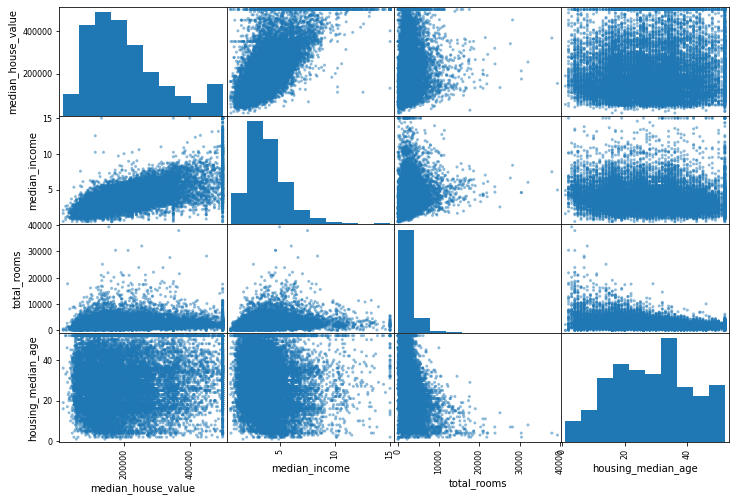

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

##### Fiche exemple de corrélation

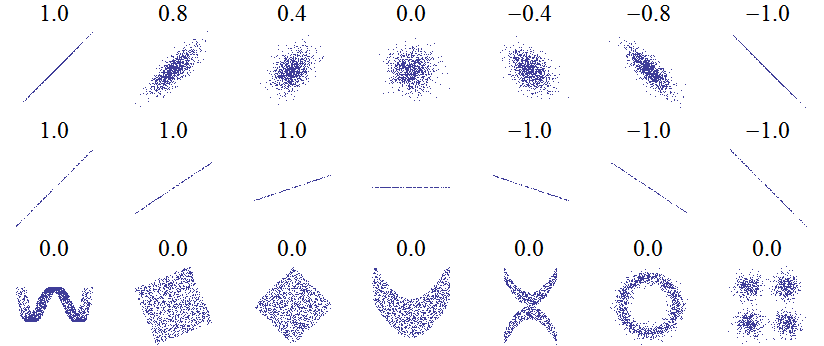

In [16]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png")

On remarque qu'entre ``median_house_value`` et ``median_income`` les points sont très proches de la droite de corrélation. Cela signifie que les deux variables sont fortement corrélées comme vu sur le graphique zoom ci-dessous.

<Axes: xlabel='median_income', ylabel='median_house_value'>

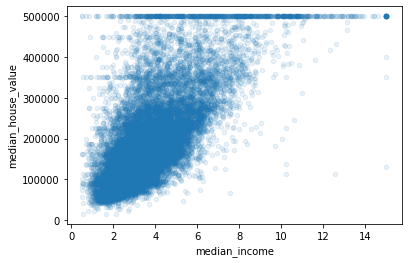

In [17]:
train_set.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

Le coefficient de correlation est compris entre -1 et 1. Plus l'indice est proche de 1, plus les deux variables sont corrélées. Plus l'indice est proche de -1, plus les deux variables sont inversément corrélées. Plus l'indice est proche de 0, plus les deux variables sont indépendantes.
Entre ``median_house_value`` et ``median_income``, on observe une forte corrélation positive. En effet, le coefficient de corrélation est de 0.69. De plus, sur le graphique ci-dessus, on observe que les points sont très proches les uns des autres. Cela signifie que les valeurs de ``median_house_value`` sont très proches des valeurs de ``median_income``. On peut supposer que plus le revenu moyen est élevé, plus la valeur médiane des maisons est élevée.

### Combinaison d'attributs
On a aussi envie de combiner certains attributs. En effet, par exemple, il semble logique de rapprocher le nombre de pièces dans le district(`total_rooms`) du nombre total de logements dans ce district (`households`). De la même manière, on peut rapprocher le nombre de chambres dans le district (`total_bedrooms`) du nombre total pièces dans le district (`total_rooms`). On peut aussi rapprocher le nombre de personnes par logement (`population`) du nombre total de logements dans le district (`households`).

In [18]:
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"] = train_set["population"]/train_set["households"]

Voyons à présent la corrélation de ces nouveaux attributs avec la valeur médiane des maisons.

In [19]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=True)

C:\Users\mathi\AppData\Local\Temp\ipykernel_19264\4056630055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
income_cat                  0.642256
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64

On obtient une corrélation négative assez prononcée avec `bedrooms_per_rooms`.
On va maintenant préparer les données pour l'apprentissage automatique.

## Pré-traitement des données
Voici quelques étapes à suivre pour pré-traiter les données pour une utilisation avec K-means :

1. Intégration des données : Intégrez les données des différentes sources en une seule source de données. Si vous travaillez avec des données provenant de plusieurs sources, vous devez les intégrer en une seule source de données. Cela vous permettra de traiter les données comme une seule entité et de les analyser plus facilement.

1. Nettoyer les données : Assurez-vous que vos données sont propres et ne contiennent pas de valeurs manquantes, de doublons ou d'autres anomalies. Si nécessaire, supprimez ou remplacez les données manquantes.

2. Normaliser les données : Normalisez les données en les mettant à l'échelle de sorte que chaque variable ait une plage de valeurs comparable. La normalisation peut être effectuée en utilisant la méthode de la moyenne et de l'écart type, la méthode de la plage ou la méthode de la normalisation de l'amplitude.

3. Réduire la dimensionnalité : Si vous travaillez avec des données à haute dimensionnalité, utilisez des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (PCA) pour réduire la dimensionnalité de vos données et faciliter leur analyse.

4. Identifier les valeurs aberrantes : Les valeurs aberrantes peuvent fausser les résultats de K-means, il est donc important de les identifier et de les traiter correctement. Les valeurs aberrantes peuvent être supprimées ou remplacées par des valeurs plus appropriées.

5. Sélectionner les caractéristiques : Si vous travaillez avec des données qui contiennent de nombreuses caractéristiques, il peut être judicieux de sélectionner les caractéristiques les plus pertinentes pour votre analyse.

En résumé, le pré-traitement des données pour K-means comprend le nettoyage des données, la normalisation des données, la réduction de la dimensionnalité, l'identification et le traitement des valeurs aberrantes et la sélection des caractéristiques. En effectuant ces étapes, vous pouvez améliorer la qualité de vos données et obtenir des résultats plus significatifs à l'aide de K-means.

### Nettoyer les données

On remarque que les données de ``total_bedrooms`` contiennent des valeurs manquantes. 20433 sur 20640. On a donc le choix :
- Supprimer l'instance
- Supprimer la _feature_
- Remplacer par une valeur (0, médiane, _etc_.)

Il n'y a pas de réponse unique, car la façon dont les valeurs manquantes sont traitées dépend du type de données et de l'analyse effectuée. Dans certains cas, remplacer les valeurs manquantes par la médiane peut être une meilleure option que de les supprimer. Voici quelques points à considérer pour prendre cette décision :

1. La fréquence des valeurs manquantes : Si le nombre de valeurs manquantes est important dans le jeu de données, la suppression de ces valeurs peut réduire considérablement la taille de votre jeu de données. Dans ce cas, il peut être préférable de remplacer les valeurs manquantes par la médiane plutôt que de les supprimer.

1. Le type de données : Le remplacement des valeurs manquantes par la médiane est particulièrement approprié pour les données numériques, car la médiane est une mesure de tendance centrale robuste qui n'est pas affectée par les valeurs aberrantes. Pour les données catégorielles, la suppression des valeurs manquantes peut être préférable.

1. L'impact sur l'analyse : Le remplacement des valeurs manquantes par la médiane peut modifier la distribution des données, ce qui peut avoir un impact sur l'analyse. Dans certains cas, cela peut être souhaitable, mais dans d'autres cas, cela peut affecter la validité des résultats.

En résumé, remplacer les valeurs manquantes par la médiane peut être une bonne option dans certains cas, mais pas dans tous les cas. Il est important de considérer la fréquence des valeurs manquantes, le type de données et l'impact sur l'analyse avant de prendre une décision.

> Pour notre jeu de données, puisque supprimer des données pourrait perdre des informations importantes, nous allons remplacer les valeurs manquantes par la médiane.

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

# index pour chaque colonne
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
train_set_num = train_set.select_dtypes(include=[np.number]) # or housing.select_dtypes(exclude=["object"])
train_set_num_tr = num_pipeline.fit_transform(train_set_num)

num_attribs = list(train_set_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_set_prepared = full_pipeline.fit_transform(train_set)
# Retransformation en DF pour avoir les noms des colonnes
train_set_prepared_df = pd.DataFrame(train_set_prepared, columns=num_attribs + ["rooms_per_household", "population_per_household", "bedrooms_per_room", "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"])

In [22]:
train_set_prepared_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,...,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-1.166015,-0.954687,...,-0.122484,0.006223,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.627451,1.890078,...,-0.911663,-0.040811,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-1.074397,-0.954687,...,-0.370939,-0.075371,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.816829,-0.954687,...,1.115873,-0.106803,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.270486,-0.006432,...,-0.526821,0.006109,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.531511,0.941823,...,-0.491732,-0.092580,0.466353,-0.092580,-0.443846,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-1.007844,-0.954687,...,-0.574363,0.023024,0.050362,0.023024,-0.516065,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.575684,-0.006432,...,0.385514,-0.037436,-0.509240,-0.037436,0.322869,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.441622,-0.006432,...,-0.506808,-0.059156,0.328149,-0.059156,-0.457023,1.0,0.0,0.0,0.0,0.0


## Étudier le nombre de cluster necessaire

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
inertia = []
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(train_set_prepared)
    inertia.append(kmeans.inertia_)
    labels = kmeans.predict(train_set_prepared)
    silhouette.append(silhouette_score(train_set_prepared, labels))

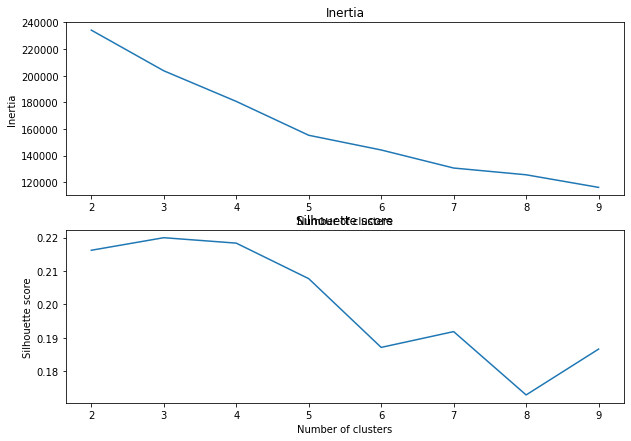

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
ax1.plot(range(2, 10), inertia)
ax1.set_title('Inertia')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax2.plot(range(2, 10), silhouette)
ax2.set_title('Silhouette score')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette score')
# Save the plot
plt.show()

## K-means
Le K-means est un algorithme de clustering qui est utilisé pour trouver des groupes de données similaires dans un ensemble de données non étiquetées. Avant de pouvoir appliquer K-means, il est important de pré-traiter les données pour s'assurer que l'algorithme fonctionne correctement et produit des résultats significatifs.

L'algorithme K-means comprend les étapes suivantes :
1. Choisir le nombre de clusters, k, que vous souhaitez créer.
2. Sélectionnez k points aléatoires à partir de votre ensemble de données, qui serviront de centres initiaux de vos clusters.
3. Pour chaque point de données, calculez la distance entre ce point et chaque centre de cluster.
4. Associez chaque point de données au centre de cluster le plus proche (en termes de distance).
5. Pour chaque cluster, calculez la moyenne de tous les points de données qui y sont associés, ce qui donnera un nouveau centre de cluster.
6. Répétez les étapes 3 à 5 jusqu'à ce que les centres de cluster ne bougent plus ou jusqu'à ce qu'un certain nombre d'itérations soit atteint.

Transcrit en Python, l'algorithme K-means ressemble à ceci :

In [25]:
import numpy as np
import random

def kmeans(data, k, max_iterations=100):
    n = data.shape[0]
    dimensions = data.shape[1]

    # Initialisation des centres de cluster
    centers = np.zeros((k, dimensions))
    for i in range(k):
        center_index = random.randint(0, n-1)
        centers[i] = data[center_index]

    # Boucle d'itération principale
    for iteration in range(max_iterations):
        # Initialisation des clusters
        clusters = [[] for _ in range(k)]

        # Attribution des points de données aux clusters les plus proches
        for point in data:
            distances = [np.linalg.norm(point - center) for center in centers]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Calcul des nouveaux centres de cluster
        new_centers = np.zeros((k, dimensions))
        for i, cluster in enumerate(clusters):
            new_center = np.mean(cluster, axis=0)
            new_centers[i] = new_center

        # Vérifier si les centres de cluster ont bougé
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return centers, clusters

Pour plus de simplicité nous utiliserons la librairie ``scikit-learn`` qui implémente l'algorithme K-means.

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(train_set_prepared)
kmeans

c:\Windows\System32\algo_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [27]:
kmeans.labels_

array([2, 1, 2, ..., 2, 1, 2])

In [28]:
kmeans.predict(train_set_prepared)

array([2, 1, 2, ..., 2, 1, 2])

In [29]:
kmeans.cluster_centers_

array([[ 2.33349199e-01, -1.94156408e-01, -9.67063855e-01,
         2.38435638e+00,  2.45836067e+00,  2.26895573e+00,
         2.46458928e+00,  1.02138848e-01,  4.02674159e-02,
         1.80609178e-01,  1.61527476e-02, -3.66752050e-02,
        -2.57443555e-02,  1.61527476e-02, -2.57443555e-02,
        -6.22461528e-02,  4.51070336e-01,  3.69266055e-01,
        -2.03287907e-19,  7.41590214e-02,  1.05504587e-01],
       [-2.37202656e-02, -8.19505836e-02, -9.21403373e-02,
        -1.50843860e-02, -2.62648599e-01, -2.55375874e-01,
        -2.55344520e-01,  1.05051744e+00,  8.34379916e-01,
         1.11387727e+00,  5.17874092e-01, -7.98040629e-01,
        -8.91000078e-03,  5.17874092e-01, -8.91000078e-03,
        -7.16817209e-01,  5.36858659e-01,  1.93630824e-01,
        -1.89735380e-19,  1.27580106e-01,  1.41930411e-01],
       [-1.82421430e-02,  6.63081151e-02,  1.71358843e-01,
        -3.00682403e-01, -1.85770716e-01, -1.64939905e-01,
        -1.90248612e-01, -5.41423331e-01, -4.24746507e

In [30]:
#Getting unique labels
label = kmeans.fit_predict(train_set_prepared)
u_labels = np.unique(label)

c:\Windows\System32\algo_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


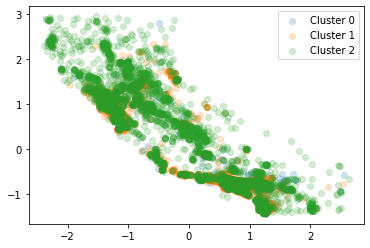

In [31]:

#plotting the results:
 
for i in u_labels:
    plt.scatter(train_set_prepared[label == i , 0] , train_set_prepared[label == i , 1] , label = "Cluster " + str(i), alpha=0.2)
plt.legend()
plt.show()